# Exponentially localised interface eigenmodes in finite chains of resonators
By: Habib Ammari, Silvio Barandun, Bryn Davies, Erik Orvehed Hiltunen, Thea Kosche, and Ping Liu

Paper available on arxiv.org

Corresponding author: silvio dot barandun at sam dot math dot ethz dot ch

## Introduction
In this notebook we reproduce the figures of the above-mentioned paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from tqdm import tqdm
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
params = {"text.usetex": True,
          "font.family": "serif",
          "font.serif": ["Computer Modern Serif"],
          "font.size": 10}
plt.rcParams.update(params)

In [4]:
import Acoustic_OneDimensional as wp

In [5]:
path_output_figures = ""
width = 6.4
figsz = (width, 4.8 / 6.4 * width)
figszh = (width / 2, 4.8 / 6.4 * width / 2)

The standard structure studied in this paper is a defect structure of dimers as shown in the figure below.

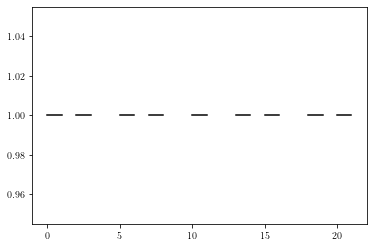

In [12]:
k = 2
s1 = 1
s2 = 2
N = 4 * k + 1
fwp = wp.FiniteWaveProblem(N=N, li=1, lij=k * [s1, s2] + k * [s2, s1])
_ = fwp.plot_geometry()

In [13]:
def get_mats(
    k: int, s1: float | int, s2: float | int
) -> [np.array, np.array, np.array]:
    """
    Generates capacitance matrix and eigendecomposition matrices for defect structure of dimers


    Parameters
    ----------
    k : int
        number of dimers on one side, total number of resonators will be 4*k+1
    s1 : float | int
        spacing intra cell on LHS
    s2 : float | int
        spacing inter cell on LHS

    Returns
    -------
    [np.array, np.array, np.array]
        Capacitance matrix, Eigenvalues, Eigenvectors
        Eigenvalues are sorted
    """

    N = 4 * k + 1
    fwp = wp.FiniteWaveProblem(N=N, li=1, lij=k * [s1, s2] + k * [s2, s1])
    C = fwp.getApproxCapacitanceMatrix()
    D, S = np.linalg.eigh(C)
    return C, D, S

## Eigenvalues and eigenvectors

In [14]:
k = 10
C, D, S = get_mats(k=k, s1=1, s2=3)

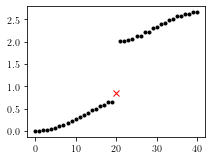

In [16]:
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(range(2 * k), D[: 2 * k], "k.", alpha=1)
_ = ax.plot(range(2 * k + 1, 4 * k + 1), D[2 * k + 1 :], "k.", alpha=1)
_ = ax.plot(2 * k, D[2 * k], "rx", alpha=1)

# plt.savefig(path_output_figures + "eigenvalues.pdf", bbox_inches="tight")

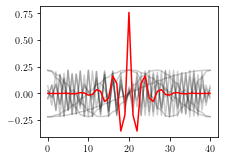

In [17]:
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(S[:, 1:5], "k", alpha=0.2)
_ = ax.plot(S[:, 4 * k - 4 :], "k", alpha=0.2)
_ = ax.plot(S[:, 2 * k], "r", alpha=1)

# plt.savefig(path_output_figures + "eigenvectors.pdf", bbox_inches="tight")

## Eigenvector behaviour based on the location of the eigenvalue

In [18]:
k = 40
C, D, S = get_mats(k=k, s1=1, s2=2)

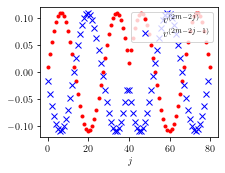

In [20]:
v = S[:, -5]
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(v[::2], "r.", label="$v^{(2m-2j)}$")
_ = ax.plot(v[1::2], "bx", label="$v^{(2m-2j-1)}$")
_ = ax.set_xlabel("$j$")
_ = ax.legend(loc="upper right")  # bbox_to_anchor=(0.8, 0.855))
# plt.savefig(path_output_figures + "eigenvector_bulk.pdf", bbox_inches="tight")

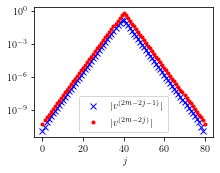

In [21]:
v = S[:, 2 * k]
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(np.abs(v[1::2]), "bx", label=r"$\vert v^{(2m-2j-1)}\vert$")
_ = ax.plot(np.abs(v[::2]), "r.", label=r"$\vert v^{(2m-2j)}\vert $")

_ = ax.set_yscale("log")
_ = ax.set_xlabel("$j$")
_ = ax.legend()
# plt.savefig(path_output_figures + "eigenvector_gap.pdf", bbox_inches="tight")

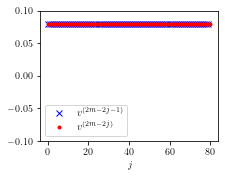

In [22]:
v = S[:, 0]
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(np.abs(v[1::2]), "bx", label=r"$ v^{(2m-2j-1)}$")
_ = ax.plot(np.abs(v[::2]), "r.", label=r"$ v^{(2m-2j)} $")

_ = ax.set_ylim(-0.1, 0.1)
_ = ax.set_xlabel("$j$")
_ = ax.legend()
# plt.savefig(path_output_figures + "eigenvector_edge_bulk.pdf", bbox_inches="tight")

## Convergence of the eigenvalue in the gap

In [23]:
def limit(s1: int | float, s2: int | float) -> float:
    """
    Computes the limit interface eigenvalue using eq (5.5) of the paper

    Parameters
    ----------
    s1 : int | float
        intra cell spacing in the LHS
    s2 : int | float
        inter cell spacing in the LHS

    Returns
    -------
    float
        limit frequency
    """
    sq = 9 / s1**2 - 14 / s1 / s2 + 9 / s2**2
    limit = -np.sqrt(sq) + (1 / s1 + 1 / s2)
    return (1 / s1 + 1 / s2) + limit / 2

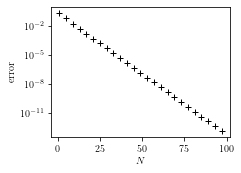

In [26]:
K = 25
interface_eig = np.zeros(K)
NN = np.zeros(K)
s1, s2 = 1, 2
ll = limit(s1=s1, s2=s2)
for k in range(K):
    C, D, S = get_mats(k + 1, s1=1, s2=2)
    NN[k] = 4 * k + 1
    interface_eig[k] = D[2 * k + 2]

errors = np.abs(interface_eig - ll)
interpol_coef = np.polyfit(NN[:20], np.log(errors[:20]), deg=1)

fig, ax = plt.subplots(figsize=figszh)
ax.plot(NN, errors, "k+")
ax.set_yscale("log")

_ = ax.set_xlabel("$N$")
_ = ax.set_ylabel("error")
# plt.savefig(path_output_figures + "convergence_error.pdf", bbox_inches="tight")

## Stability 
### Interface frequency stability

In [29]:
k = 10
N = 2 * 2 * k + 1

Nsigmas = 50
sigmas = np.linspace(0.01, 0.2, Nsigmas, endpoint=True)

Nruns = 1
int_eig = np.zeros((Nsigmas, Nruns))
eigs = np.zeros((Nsigmas, Nruns, N))
deigs = np.zeros((Nsigmas, Nruns, N))

lij = np.array(k * [1, 2] + k * [2, 1])

fwp = wp.FiniteWaveProblem(N=N, li=1, lij=lij)
C_pure = fwp.getApproxCapacitanceMatrix()
D_pure, S_pure = np.linalg.eigh(C_pure)

eps = np.zeros((Nsigmas, Nruns))

for i, sigma in tqdm(enumerate(sigmas), total=Nsigmas):
    for j in range(Nruns):
        lij = np.array(k * [1, 2] + k * [2, 1])

        lij = lij + np.random.uniform(-sigma, sigma, size=N - 1)

        fwp = wp.FiniteWaveProblem(N=N, li=1, lij=lij)
        C = fwp.getApproxCapacitanceMatrix()
        D, S = np.linalg.eigh(C)
        int_eig[i, j] = D[2 * k]
        eigs[i, j, :] = D
        deigs[i, j, :] = D - D_pure
        eps[i, j] = np.max(np.diag(C_pure - C))

100%|██████████| 50/50 [00:00<00:00, 2145.31it/s]


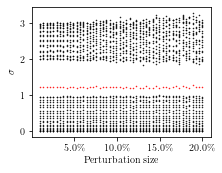

In [30]:
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(sigmas * 100, eigs[:, 0, 2 * k + 1 :], "k.", markersize=1)
_ = ax.plot(sigmas * 100, eigs[:, 0, : 2 * k], "k.", markersize=1)
_ = ax.plot(sigmas * 100, eigs[:, 0, 2 * k], "r.", markersize=1)
_ = ax.set_xlabel("Perturbation size")
_ = ax.set_ylabel("$\sigma$")
_ = ax.xaxis.set_major_formatter(mtick.PercentFormatter())
# plt.savefig(path_output_figures + "stability_spectrum.pdf", bbox_inches="tight")

### Stability of the interface mode

In [31]:
k = 10
N = 2 * 2 * k + 1

Nsigmas = 30
sigmas = np.linspace(0.01, 0.2, Nsigmas, endpoint=True)

Nruns = 100
int_eig = np.zeros((Nsigmas, Nruns))
eigs = np.zeros((Nsigmas, Nruns, N))
deigs = np.zeros((Nsigmas, Nruns, N))
deve = np.zeros((Nsigmas, Nruns, N, N))

lij = np.array(k * [1, 2] + k * [2, 1])

fwp = wp.FiniteWaveProblem(N=N, li=1, lij=lij)
C_pure = fwp.getApproxCapacitanceMatrix()
D_pure, S_pure = np.linalg.eigh(C_pure)

eps = np.zeros((Nsigmas, Nruns))

for i, sigma in tqdm(enumerate(sigmas), total=Nsigmas):
    for j in range(Nruns):
        lij = np.array(k * [1, 2] + k * [2, 1])

        lij = lij + np.random.uniform(-sigma, sigma, size=N - 1)

        fwp = wp.FiniteWaveProblem(N=N, li=1, lij=lij)
        C = fwp.getApproxCapacitanceMatrix()
        D, S = np.linalg.eigh(C)
        int_eig[i, j] = D[2 * k]
        eigs[i, j, :] = D
        deigs[i, j, :] = D - D_pure
        deve[i, j, :, :] = S - S_pure

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:01<00:00, 22.73it/s]


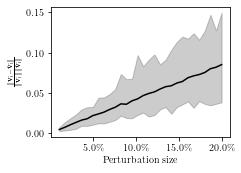

In [32]:
fig, ax = plt.subplots(figsize=figszh)
_ = ax.plot(
    sigmas * 100, np.mean(np.linalg.norm(deve[:, :, :, 2 * k], axis=2), axis=1), "k"
)
_ = ax.fill_between(
    sigmas * 100,
    np.max(np.linalg.norm(deve[:, :, :, 2 * k], axis=2), axis=1),
    np.min(np.linalg.norm(deve[:, :, :, 2 * k], axis=2), axis=1),
    alpha=0.2,
    color="k",
)
_ = ax.xaxis.set_major_formatter(mtick.PercentFormatter())
_ = ax.set_xlabel("Perturbation size")
_ = ax.set_ylabel(
    r"$\frac{\Vert \mathbf{v}_\mathsf{i}-\hat{\mathbf{v}}_\mathsf{i}\Vert}{\Vert \mathbf{v}_\mathsf{i}\Vert\Vert \hat{\mathbf{v}}_\mathsf{i}\Vert}$"
)
# plt.savefig(path_output_figures + "stability_interfacemode.pdf", bbox_inches="tight")

## Discrete topological indicator

In [33]:
def I(u, ncell=2):
    u_new = np.zeros_like(u)
    for i in range(len(u) // 2):
        u_new[i * ncell : (i + 1) * ncell] = np.flip(u[i * ncell : (i + 1) * ncell])

    return np.dot(u, u_new) / np.linalg.norm(u)

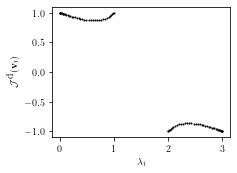

In [34]:
s1 = 1
s2 = 2
fig, ax = plt.subplots(figsize=figszh)

k = 20
N = 2 * 2 * k
fwp = wp.FiniteWaveProblem(N=N, li=1, lij=(2 * k - 1) * [s1, s2] + [s1])
C = fwp.getApproxCapacitanceMatrix()
D, S = np.linalg.eigh(C)

Is = np.zeros_like(D)
for i in range(len(D)):
    Is[i] = I(S[:, i], ncell=2)

_ = ax.plot(D, Is, "k.", markersize=2)
_ = ax.set_xlabel("$\lambda_i$")
_ = ax.set_ylabel(r"$\mathcal{J}^{\textrm{d}}(\mathbf{v}_i)$")
# plt.savefig(path_output_figures + "discrete_indicator.pdf", bbox_inches="tight")

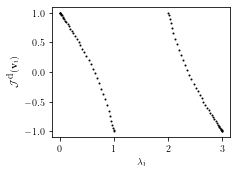

In [35]:
s1 = 2
s2 = 1
fig, ax = plt.subplots(figsize=figszh)

k = 20
N = 2 * 2 * k
fwp = wp.FiniteWaveProblem(N=N, li=1, lij=(2 * k - 1) * [s1, s2] + [s1])
C = fwp.getApproxCapacitanceMatrix()
D, S = np.linalg.eigh(C)

Is = np.zeros_like(D)
for i in range(len(D)):
    Is[i] = I(S[:, i], ncell=2)

_ = ax.plot(D, Is, "k.", markersize=2)
_ = ax.set_xlabel("$\lambda_i$")
_ = ax.set_ylabel(r"$\mathcal{J}^{\textrm{d}}(\mathbf{v}_i)$")
# plt.savefig(path_output_figures + "discrete_indicator2.pdf", bbox_inches="tight")